In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.shape

(300, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
df.columns = ['Signal', 'Density']

In [7]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='Signal', ylabel='Density'>

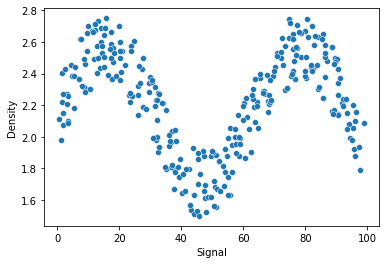

In [8]:
sns.scatterplot(x='Signal', y= 'Density', data=df)

In [16]:
X = df['Signal'].values.reshape(-1,1)

In [17]:
y = df['Density']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr_model = LinearRegression()

In [22]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
lr_preds = lr_model.predict(X_test)

In [25]:
lr_preds  ### y_hat

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [28]:
##y_test ### actual_y

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
mean_absolute_error(y_test, lr_preds) ### MAE

0.211198973318633

In [32]:
np.sqrt(mean_squared_error(y_test, lr_preds)) ### RMSE

0.25700519965846297

In [34]:
signal_range = np.arange(0,100)
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [36]:
signal_pred = lr_model.predict(signal_range.reshape(-1,1))
signal_pred

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

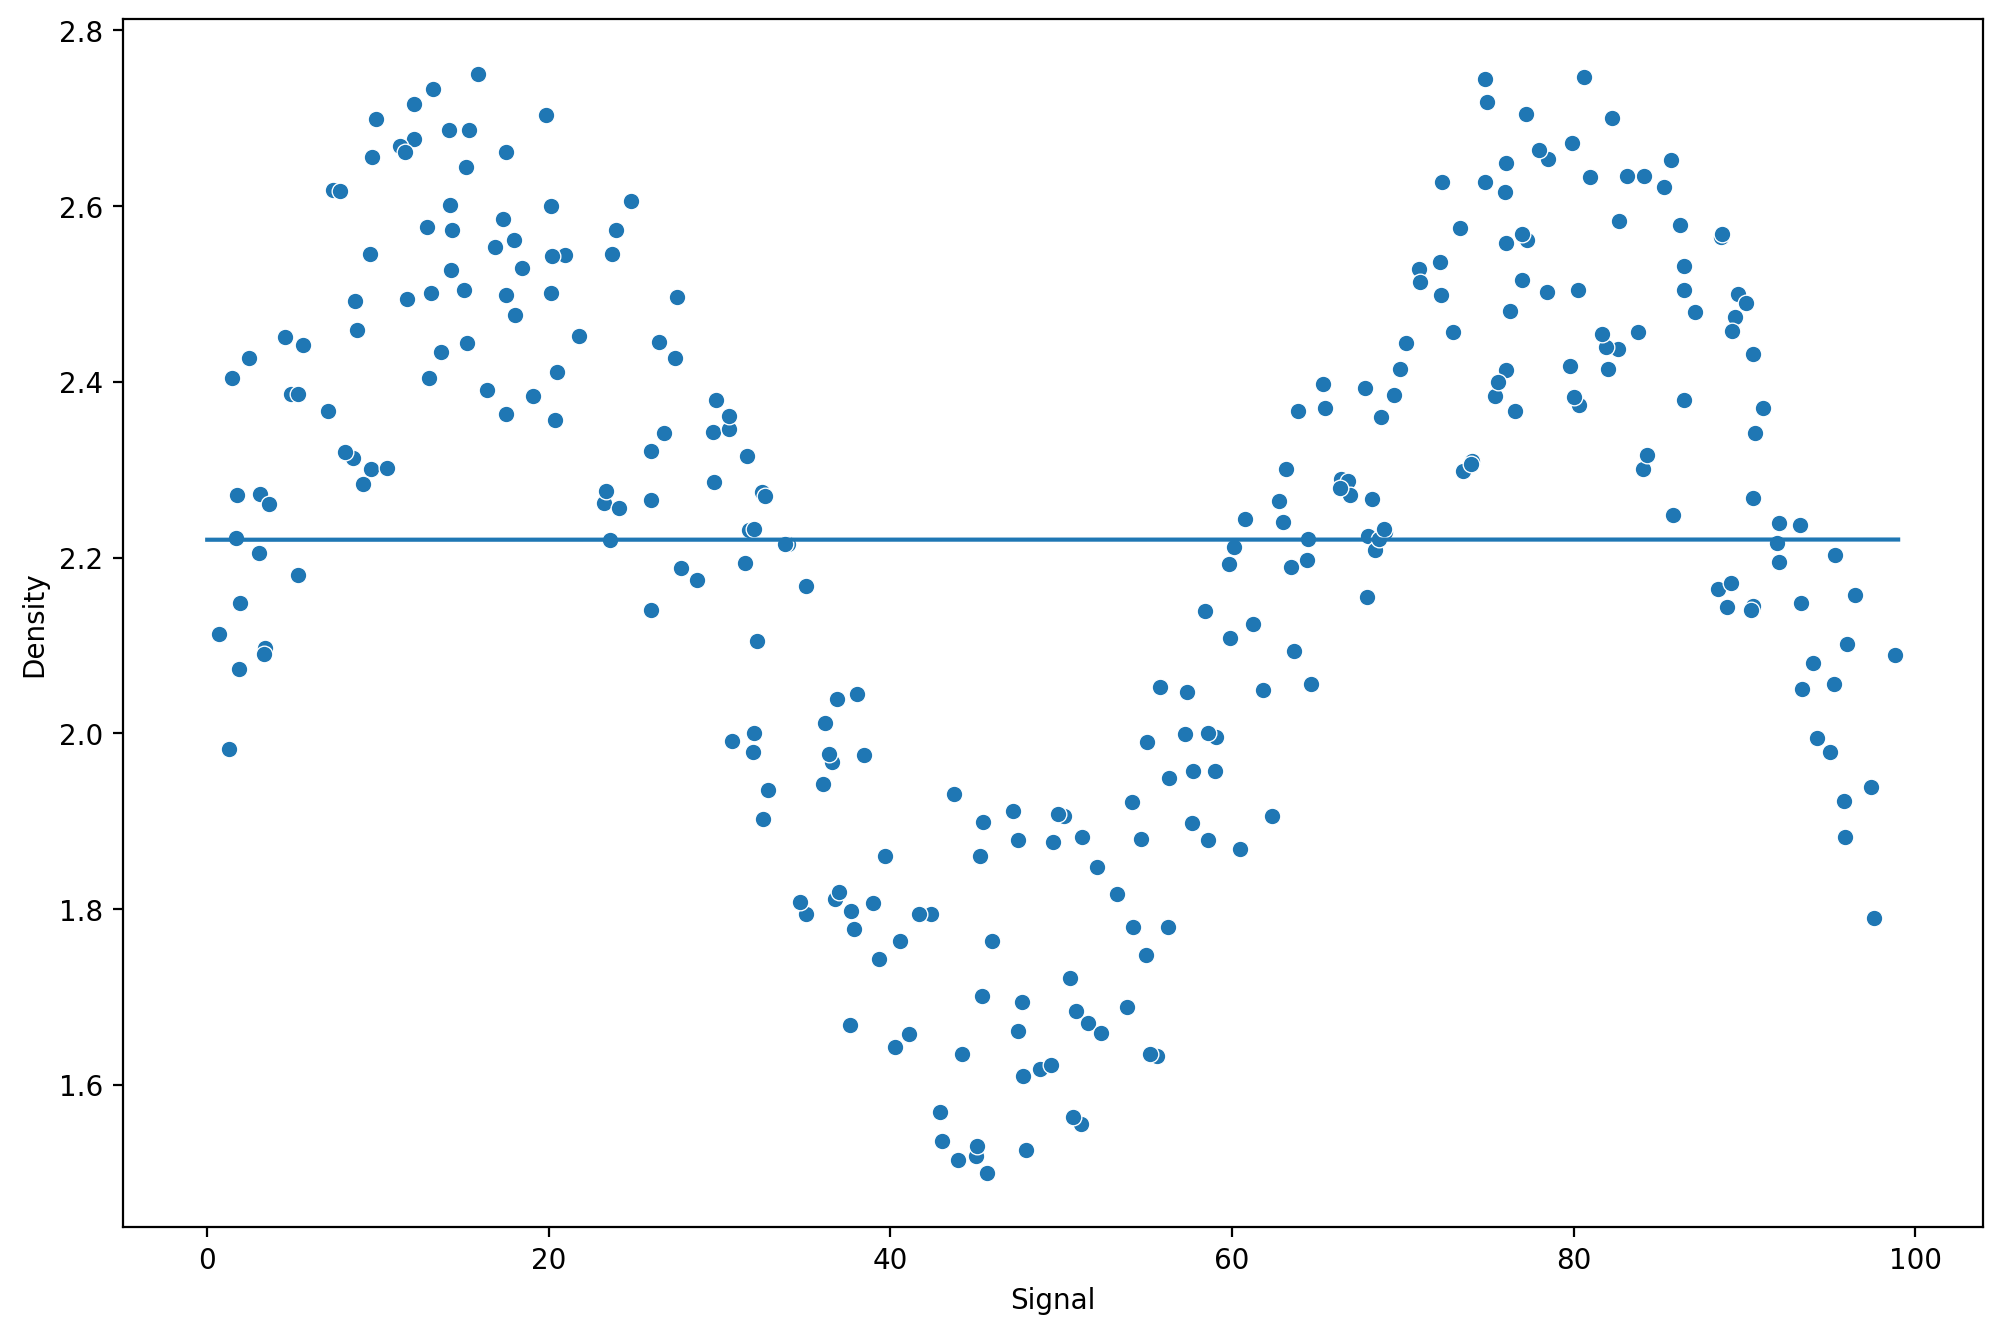

In [37]:
plt.figure(figsize=(12,8), dpi = 200)
sns.scatterplot(x='Signal', y= 'Density', data=df)

plt.plot(signal_range, signal_pred)

In [38]:
def run_model(model, X_train,y_train,X_test, y_test):
    
    ##Fit model train
    model.fit(X_train, y_train)
    
    ## Get metrics
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'MAE : {mae}')
    print(f'RMSE: {rmse}')
    
    ## Plot the results of model signal range
    signal_range = np.arange(0,100)
    signal_pred = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8), dpi = 200)
    sns.scatterplot(x='Signal', y= 'Density', data=df, color = 'red')
    plt.plot(signal_range, signal_pred)

MAE : 0.211198973318633
RMSE: 0.25700519965846297


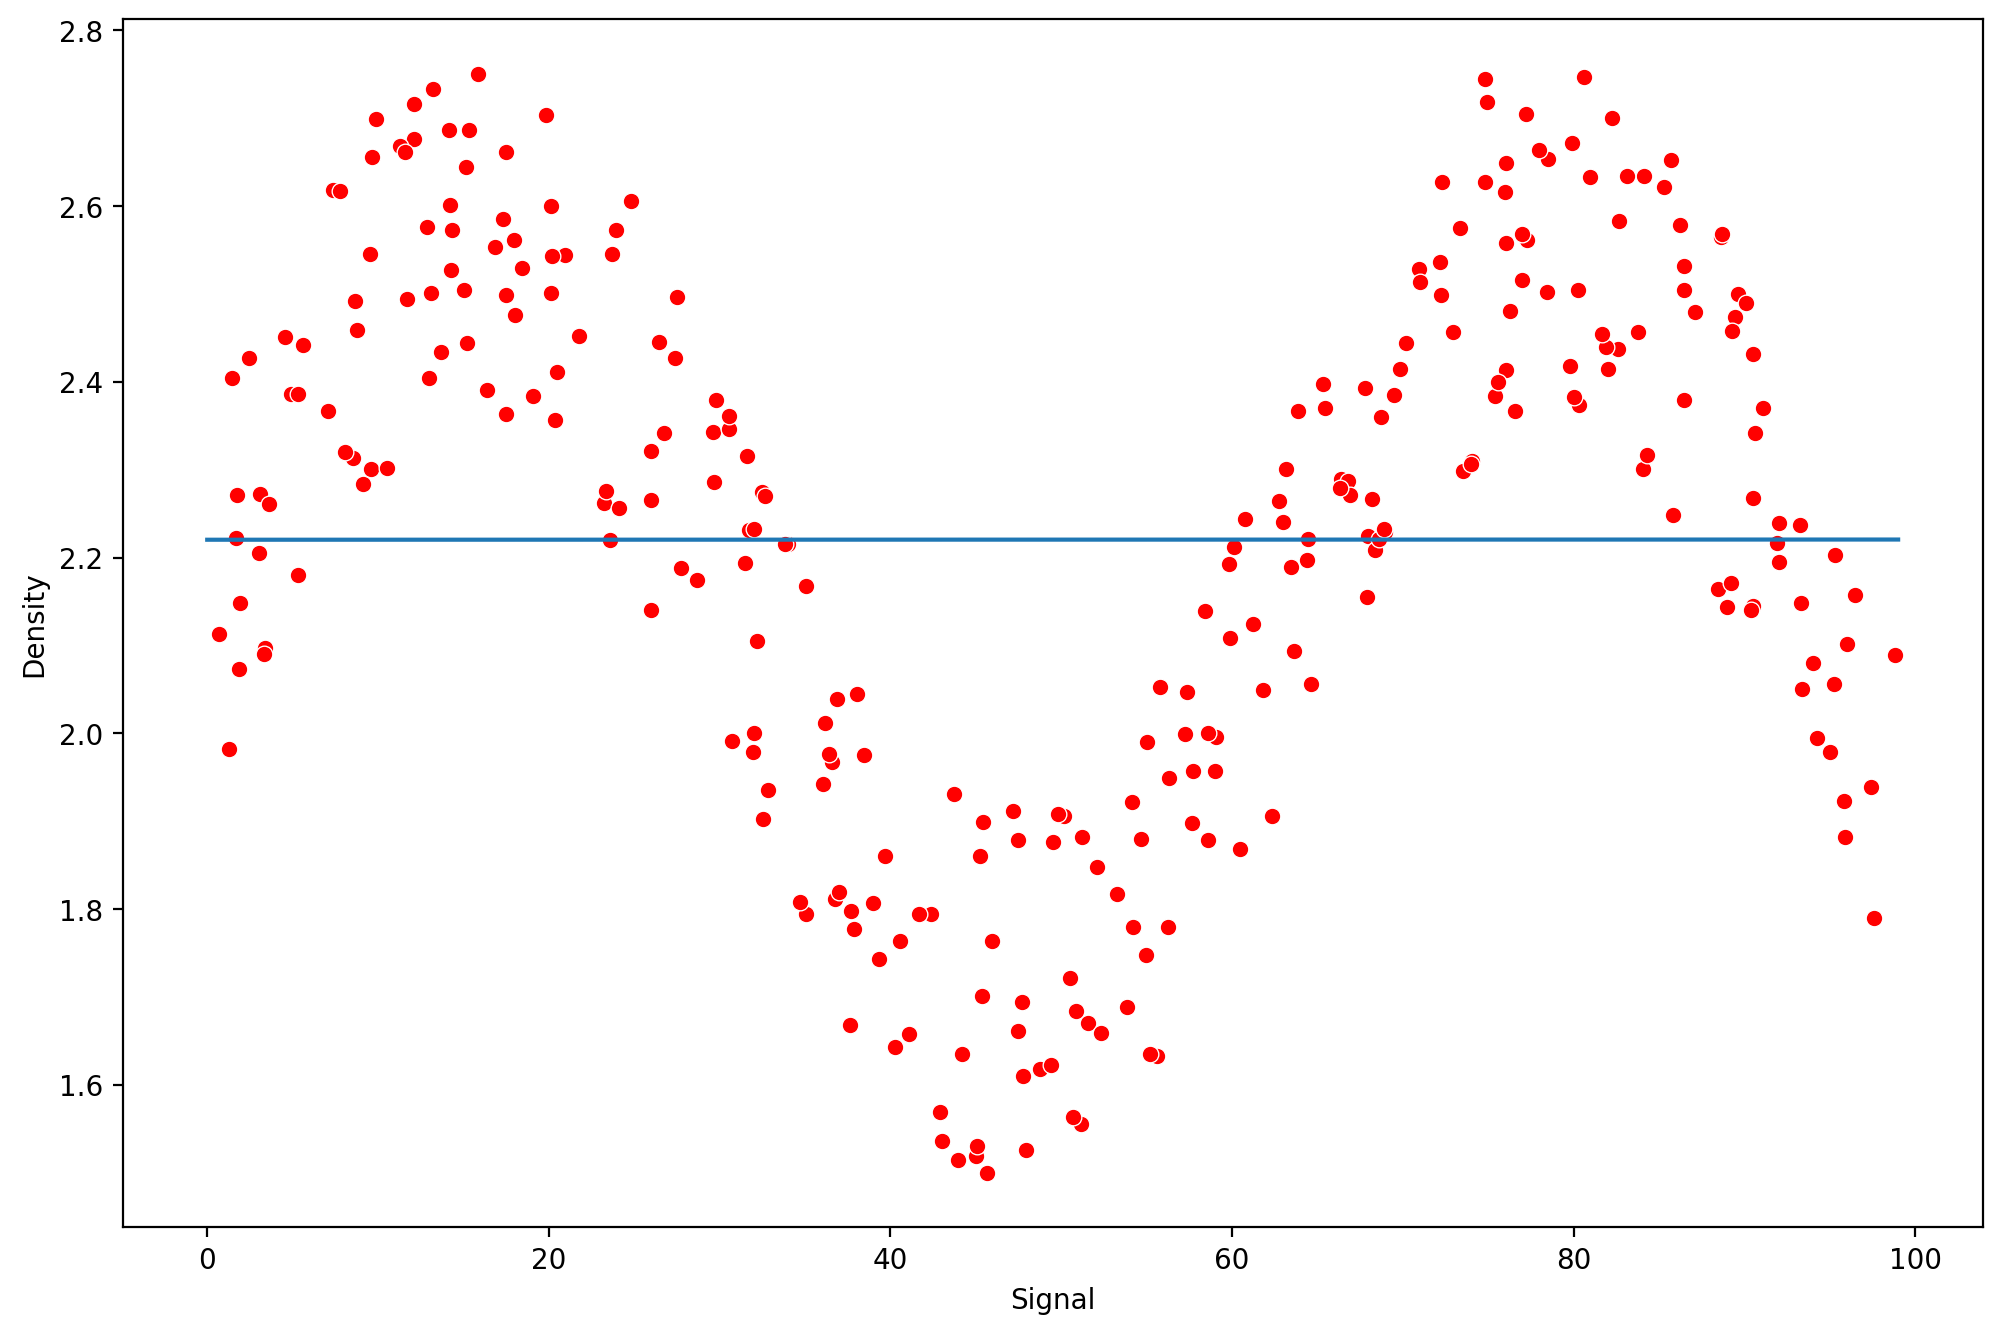

In [39]:
model = LinearRegression()
run_model(model, X_train,y_train,X_test, y_test)

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [51]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE : 0.11969100044514433
RMSE: 0.1380740689295549


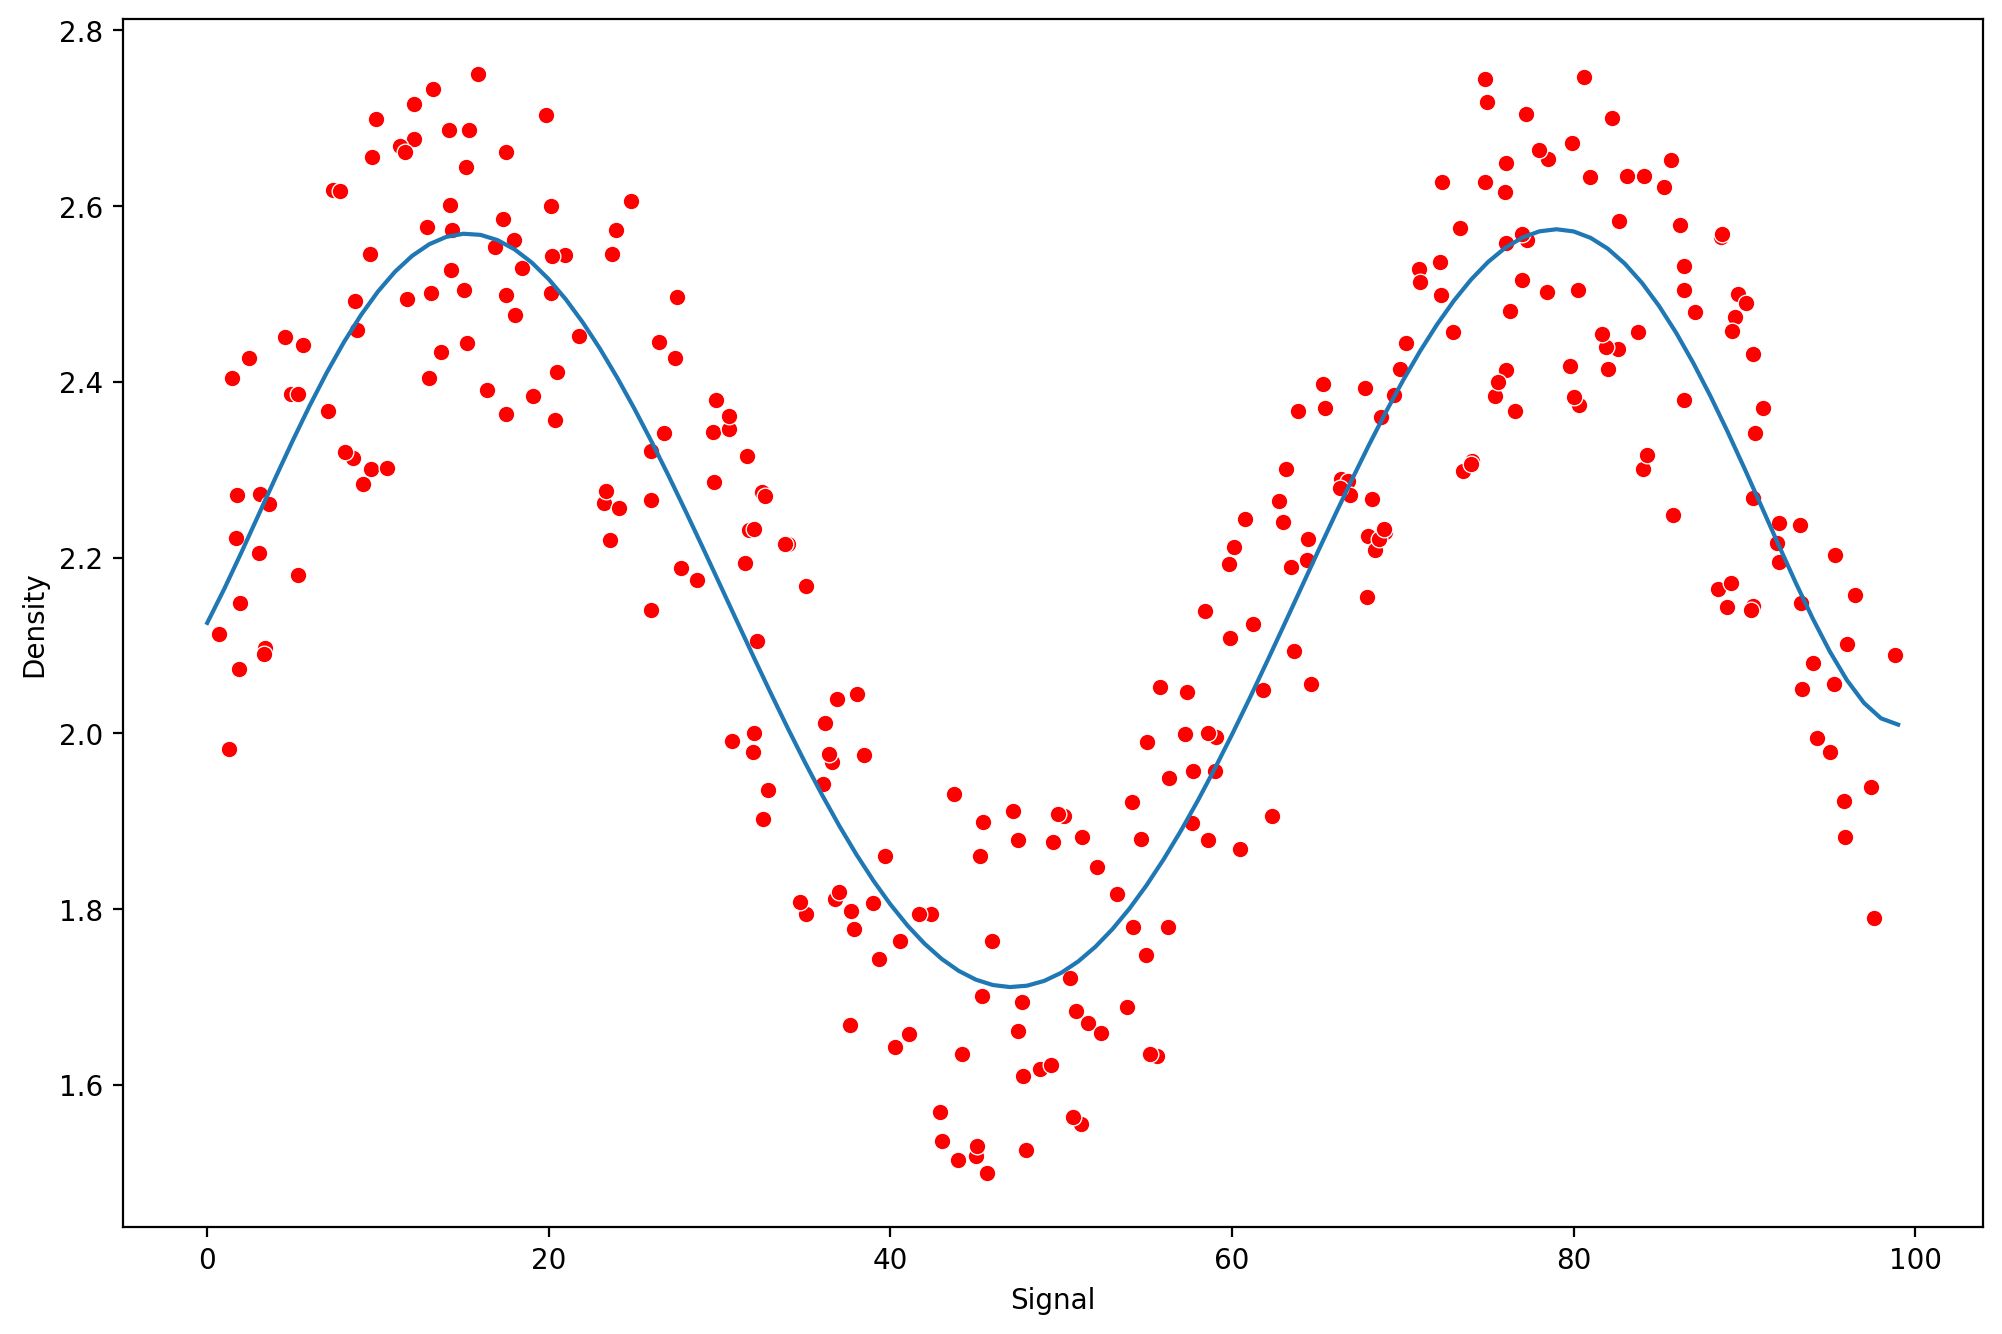

In [52]:
run_model(pipe,X_train,y_train,X_test, y_test)

In [53]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442382
RMSE: 0.15234870286353372


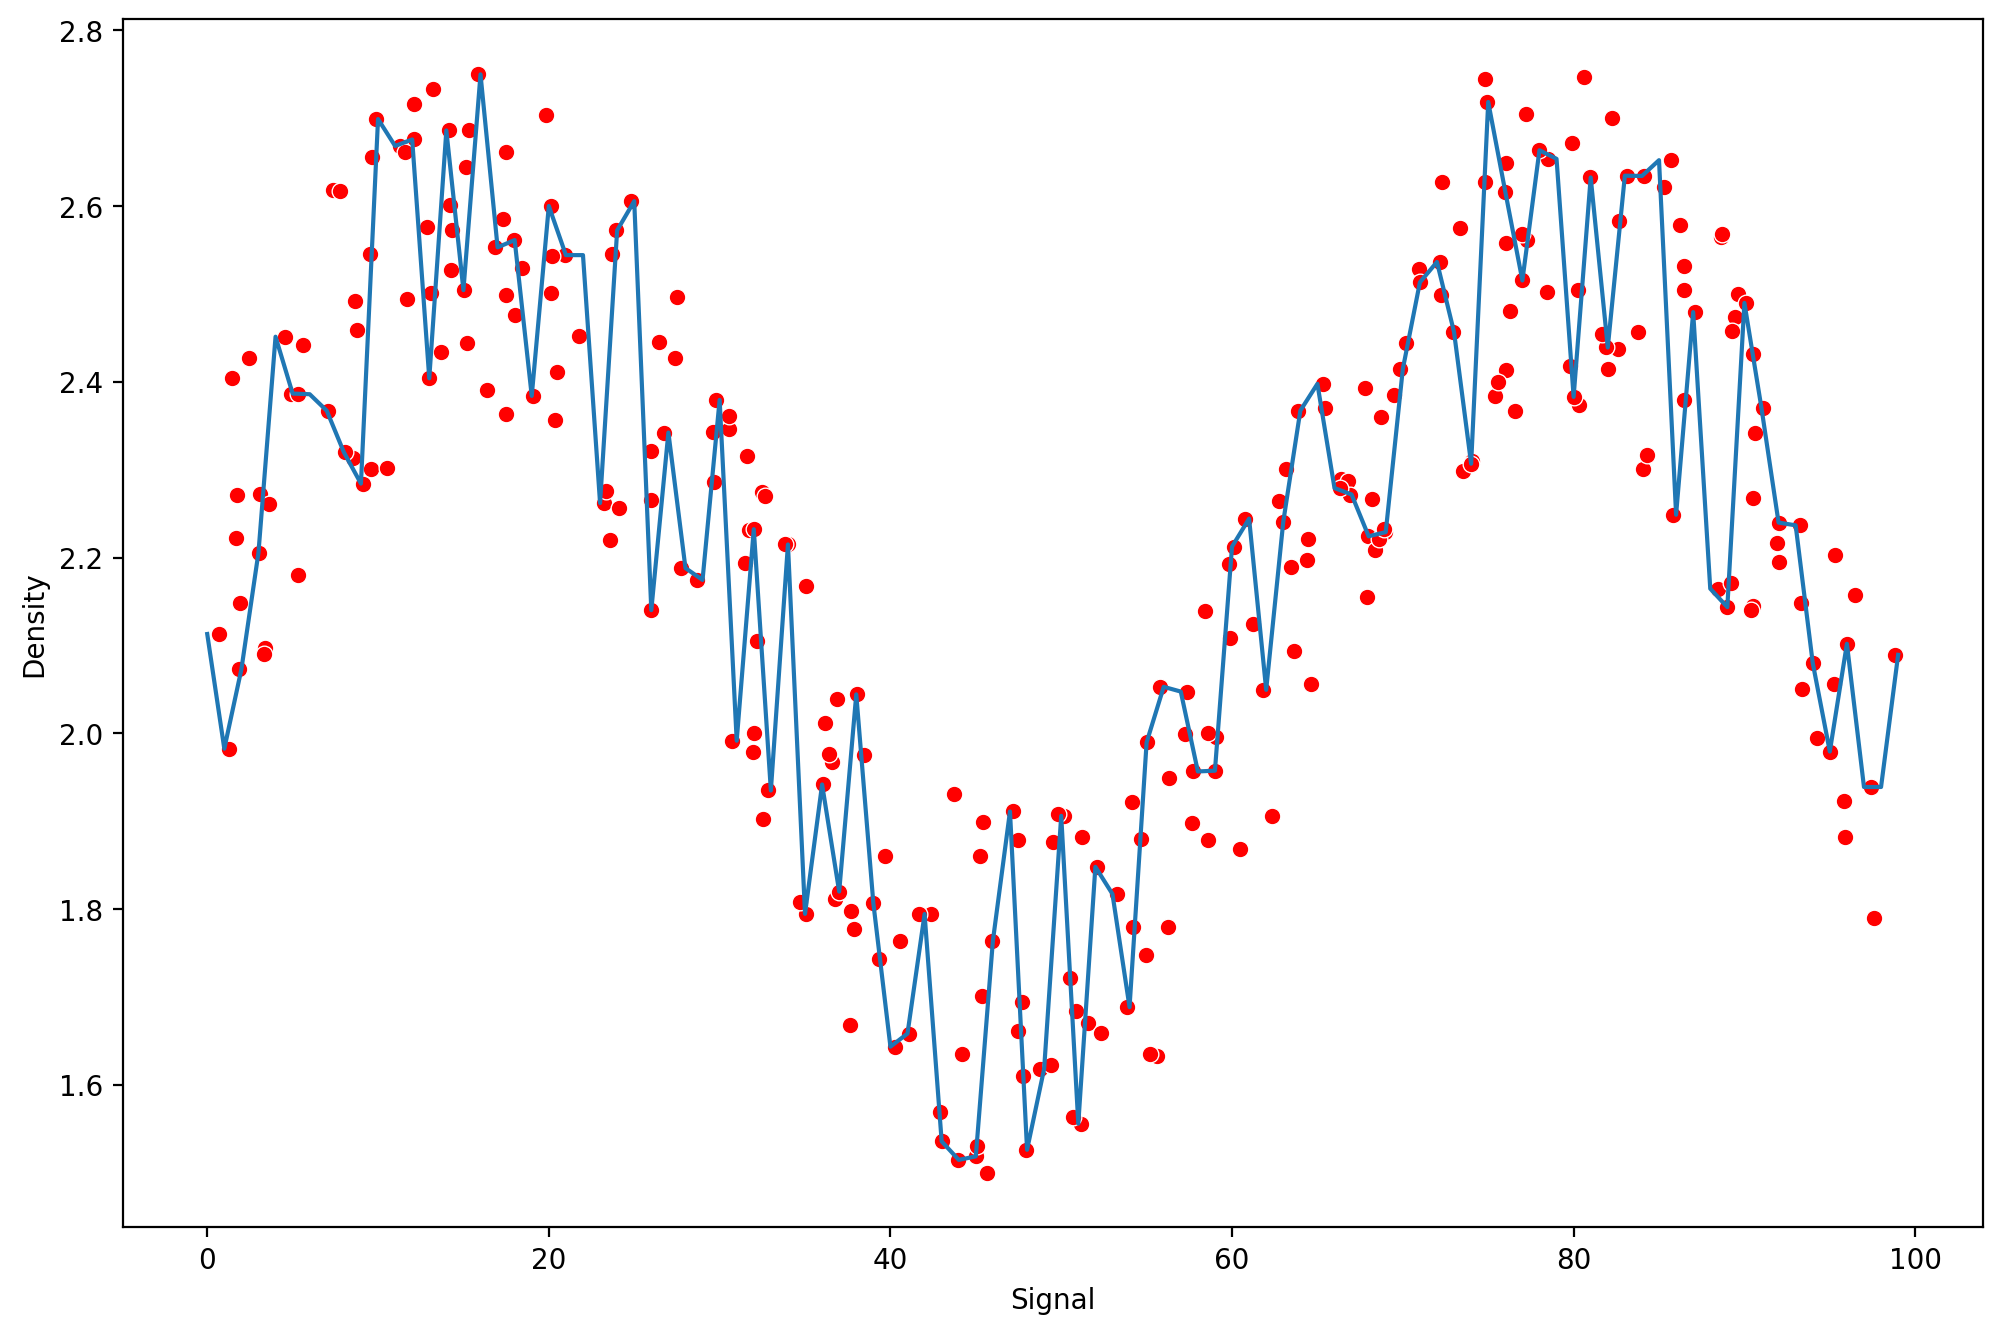

In [58]:
k_values=[1]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [56]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442382
RMSE: 0.15234870286353372


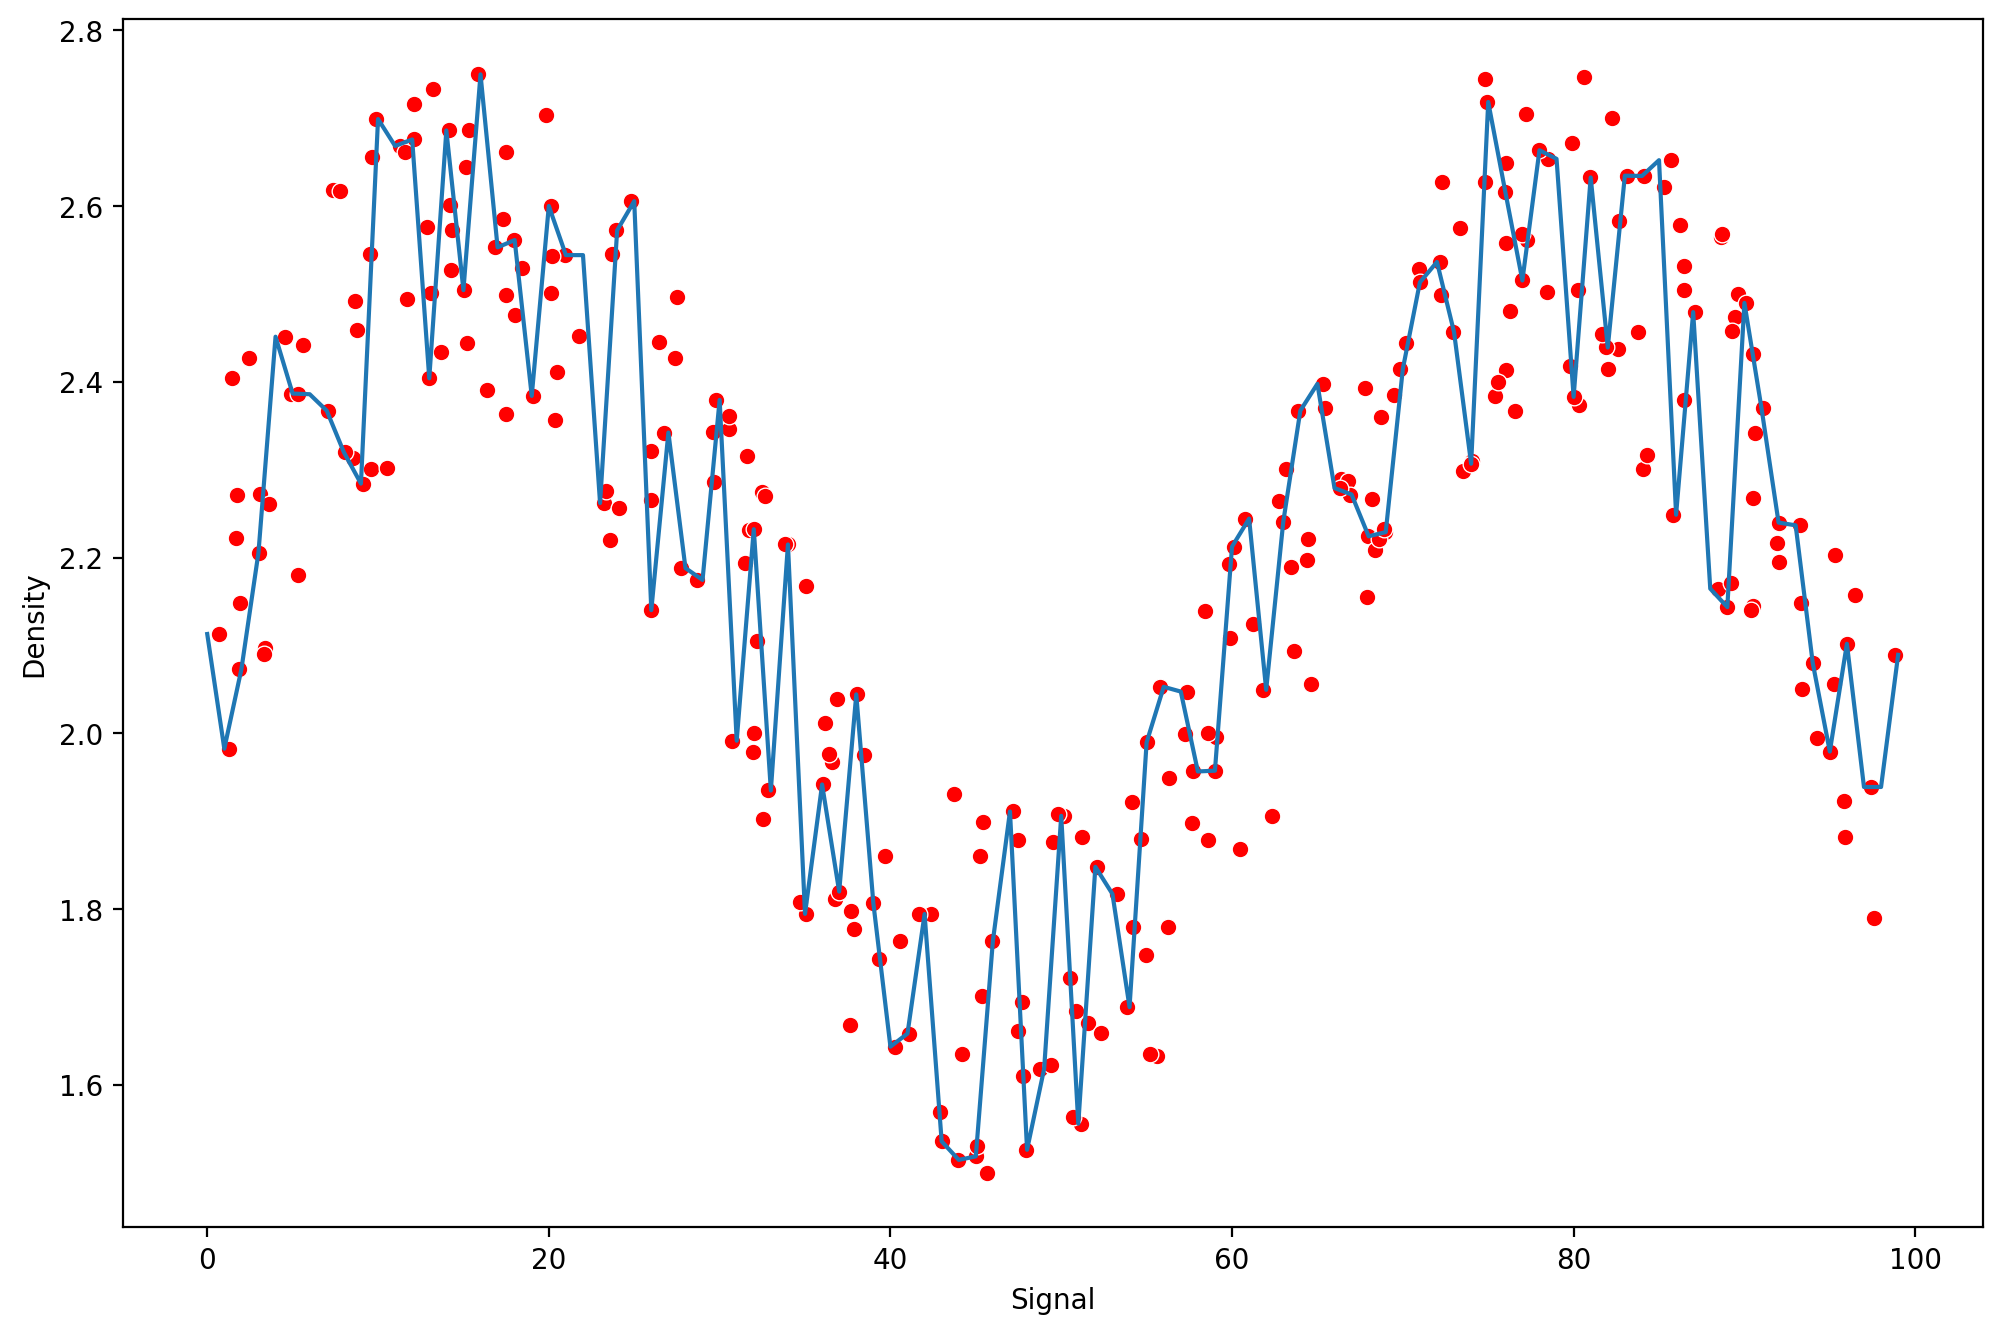

In [57]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [59]:
from sklearn.svm import SVR

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100],
             'gamma': ['auto', 'scale']}

grid = GridSearchCV(svr, param_grid)

MAE : 0.11243103141069175
RMSE: 0.13015742723602505


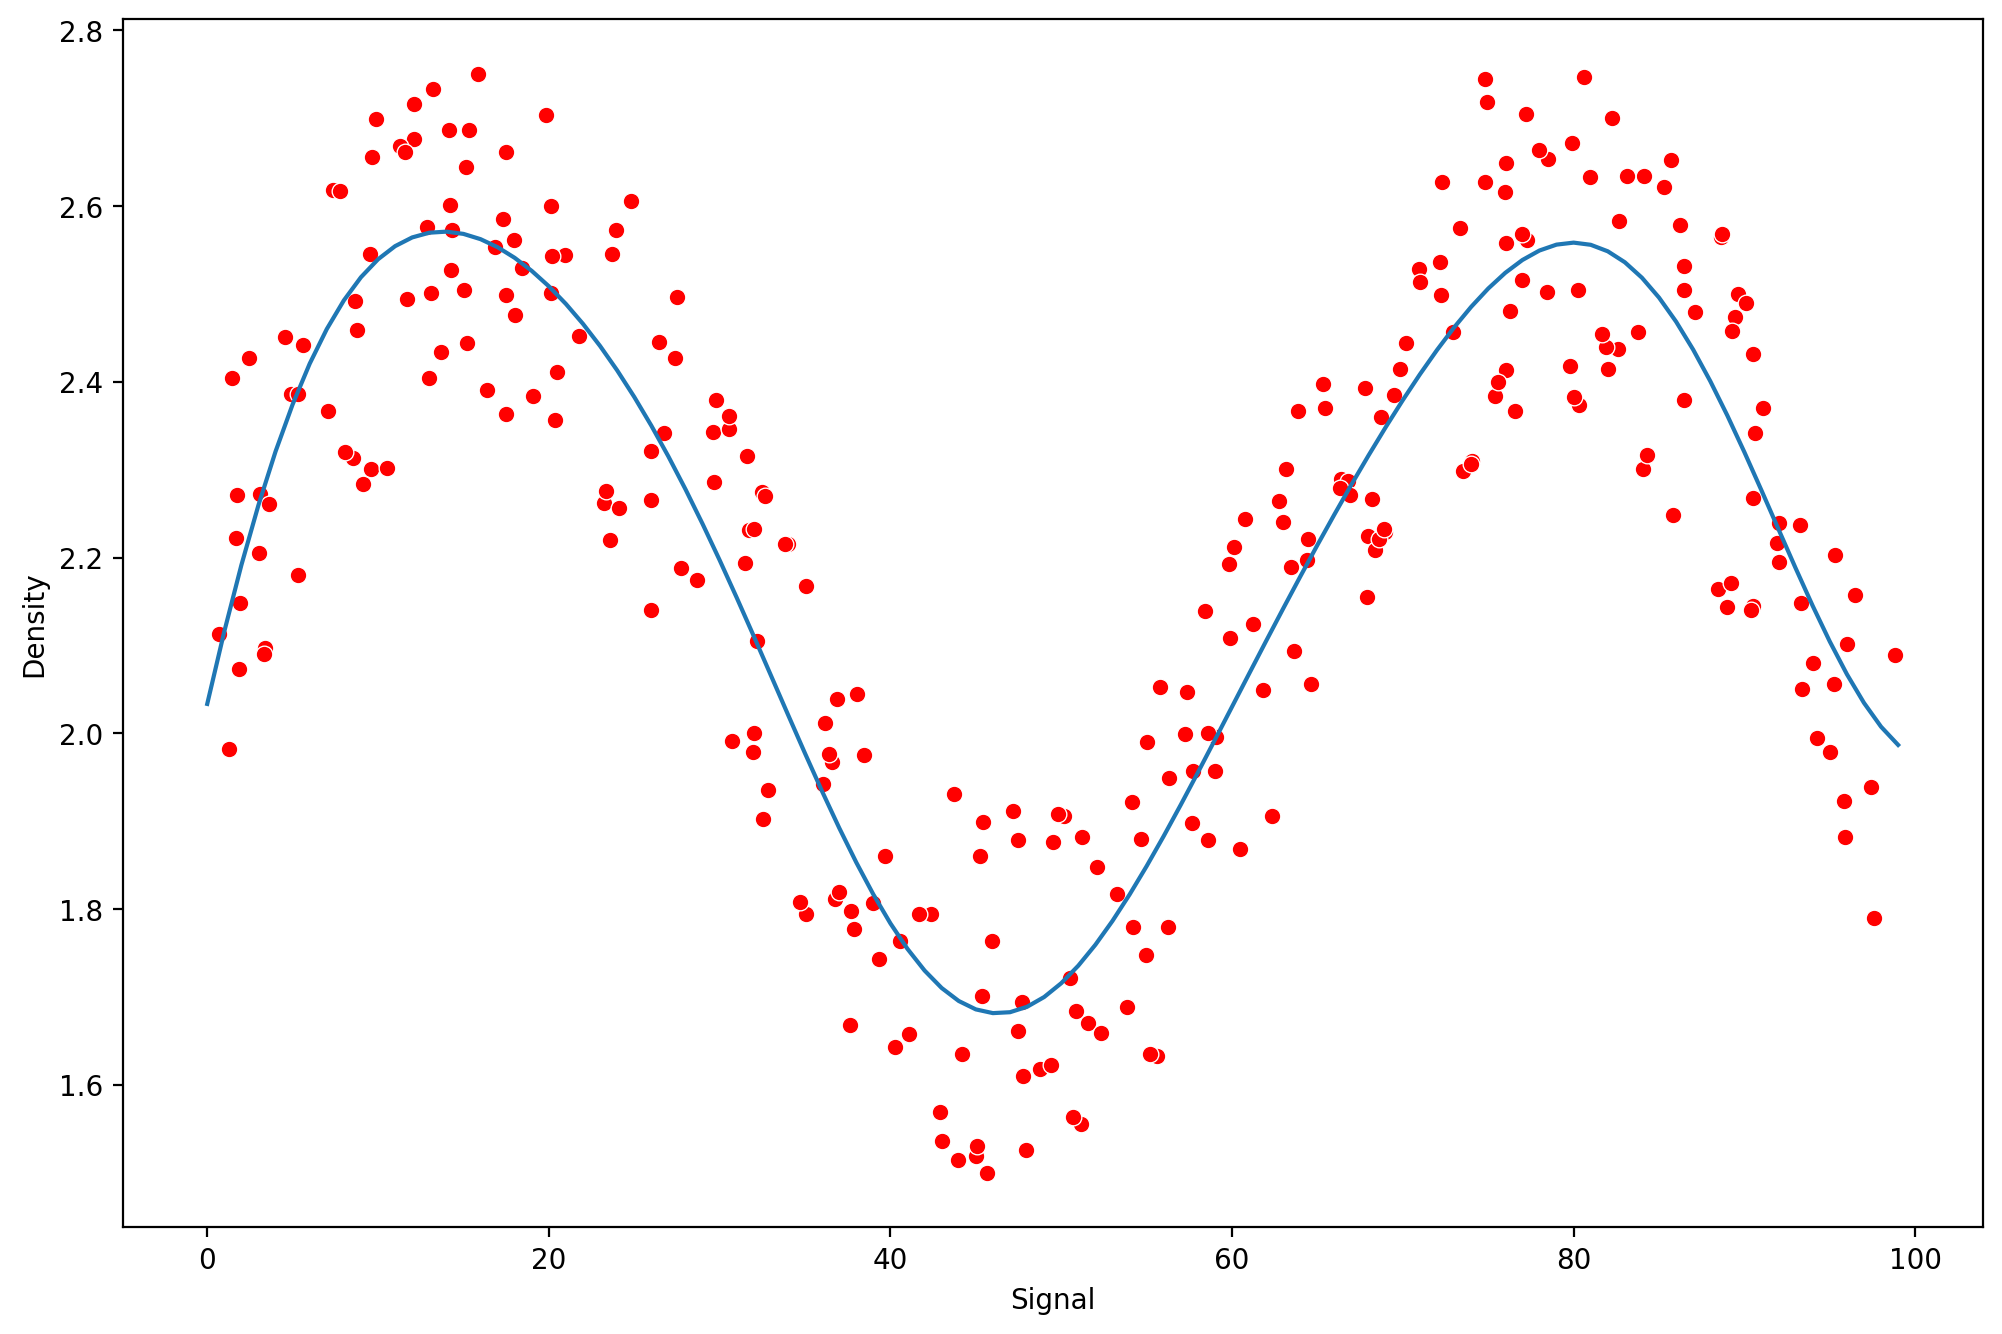

In [62]:
run_model(grid, X_train, y_train, X_test, y_test)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rfr = RandomForestRegressor(n_estimators=10)

MAE : 0.1098620112364254
RMSE: 0.13454033258870224


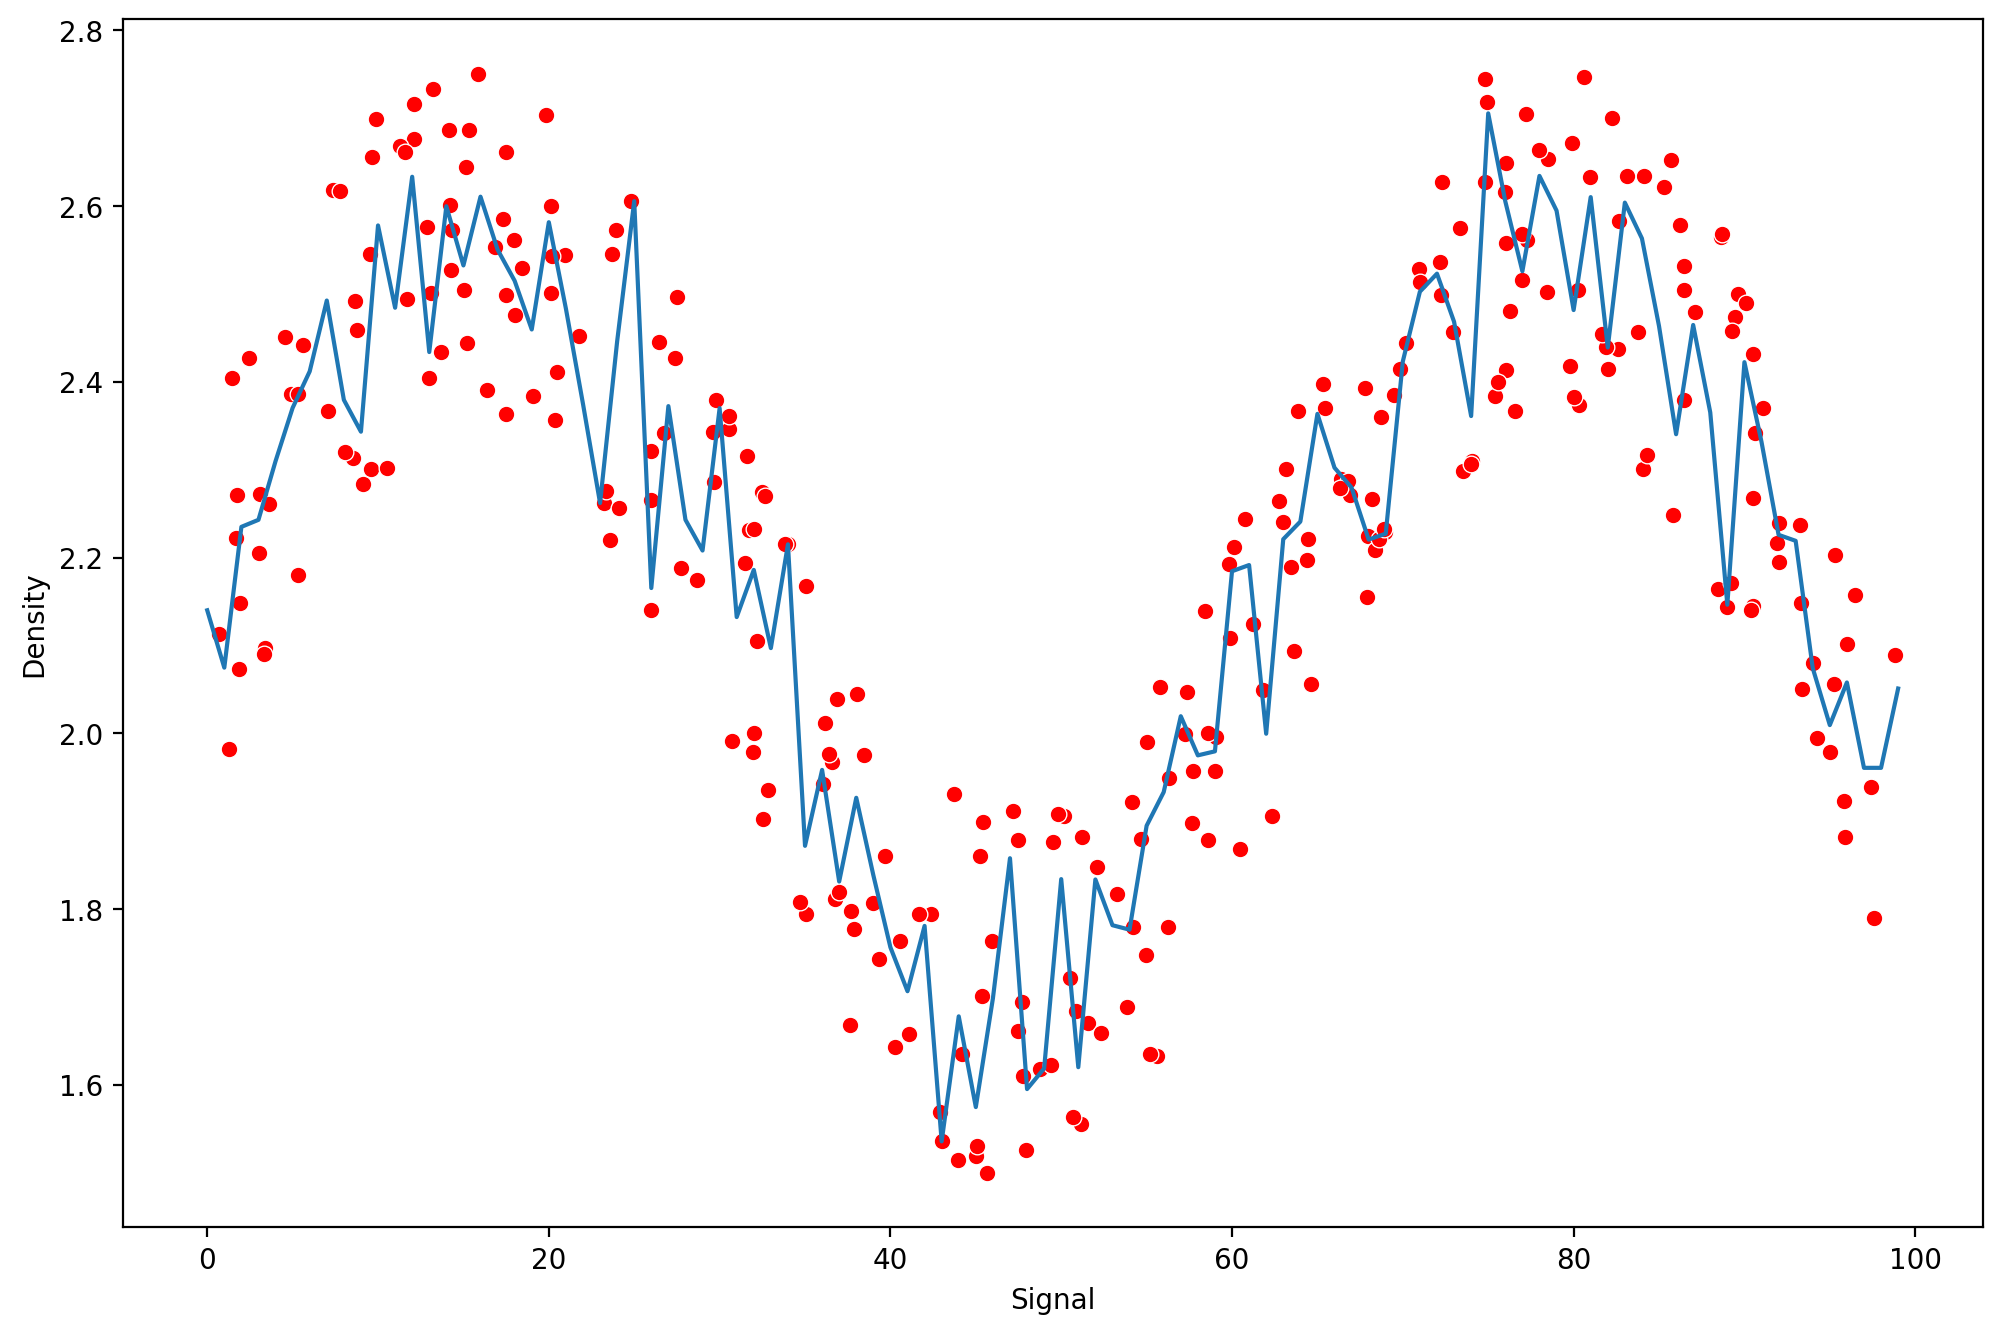

In [65]:
run_model(rfr, X_train, y_train, X_test, y_test)